# ARIMA

One of the most common methods used in time series forecasting is known as the ARIMA model, which stands for AutoregRessive Integrated Moving Average. 
ARIMA, is a forecasting method for univariate time series data that can be fitted to time series data in order to better understand or predict future points in the series.

ARIMA as it stands has limited support for seasonal data.

In [ ]:
import pandas as pd
import numpy as np

from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

from matplotlib.pyplot import figure


--------------------------------------------------------------------------------
# Air Passenger Data

The Box and Jenkins Airline Passengers dataset describes the total number of US international airline passengers over a period of time. The units are a count of the number of monthly international airline passengers in thousands. There are 144 monthly observations from 1949 to 1960. 

Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) Time Series Analysis, Forecasting and Control. Third Edition. Holden-Day. Series G.

Available from:
https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

# Create Data

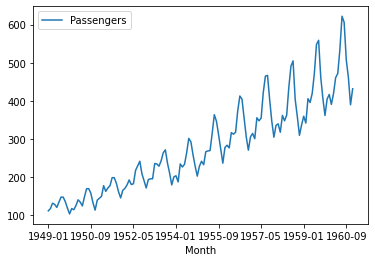

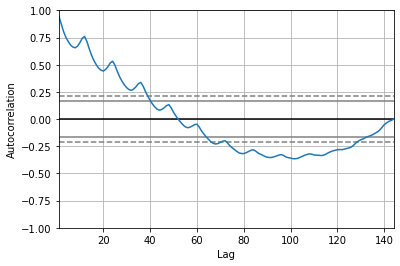

In [ ]:
from google.colab import files
from pandas import read_csv

#uploaded = files.upload()

series = read_csv('airline-passengers.csv', header=0, index_col=0)
series.plot()
plt.show()

date_rng = pd.date_range('1949-01', periods=144, freq='MS')

# Define a dataframe using x and y values.
df = pd.DataFrame(data=series['Passengers'], index=date_rng, columns=['Passengers'])

autocorrelation_plot(df)
plt.show()


# Create ARIMA Model

Generally start with low values of p,d,q and use trial and error. 

However, we know the data has a trend so use d = 1 here.
The data is also seasonal so a p  term > 1 will help, but more on this later.
We can leave q = 0.

In [ ]:
arima_model = ARIMA(df, order=(5, 1, 0) )
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -688.248
Method:                       css-mle   S.D. of innovations             29.720
Date:                Tue, 08 Dec 2020   AIC                           1390.495
Time:                        15:49:06   BIC                           1411.235
Sample:                    02-01-1949   HQIC                          1398.923
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6402      2.016      1.310      0.193      -1.311       6.592
ar.L1.D.Passengers     0.3120      0.084      3.715      0.000       0.147       0.477
ar.L2.D.Passengers  

# ARIMA Forecast Air Passengers

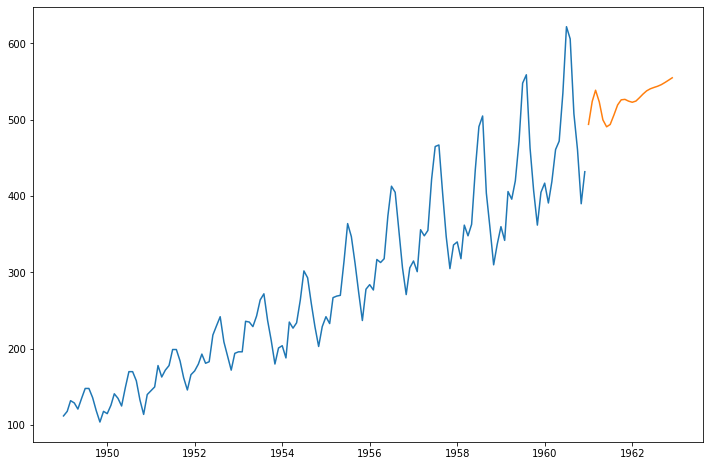

In [ ]:
forecast_length=24
forecast_rng = pd.date_range('1961-01-01', periods=forecast_length, freq='MS')

forecast = arima_model_fit.forecast(steps=forecast_length)

plt.figure(figsize=(12,8))
plt.plot(df.index, df['Passengers'])
plt.plot(forecast_rng, forecast[0])
plt.show()

# Create SARIMA Model

Seasonal ARIMA (SARIMA) extends ARIMA to cope with seasonal data. It takes additional parameters (P,D,Q,M)

  SARIMA(p, d, q)(P, D, Q, M)

where P,D,Q are seasonal variants of (p,d,q) and M is the number of time steps for a single seasonal period - 12 for this data set.

In [ ]:
sarima_model = SARIMAX(df, order=(1, 1, 0), seasonal_order=(1,1,0,12) )
sarima_model_fit = sarima_model.fit()
print(sarima_model_fit.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -507.196
Date:                            Tue, 08 Dec 2020   AIC                           1020.393
Time:                                    15:49:06   BIC                           1029.019
Sample:                                01-01-1949   HQIC                          1023.898
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2965      0.082     -3.601      0.000      -0.458      -0.135
ar.S.L12      -0.1397      0.091   

# SARIMA Forecast Air Passengers

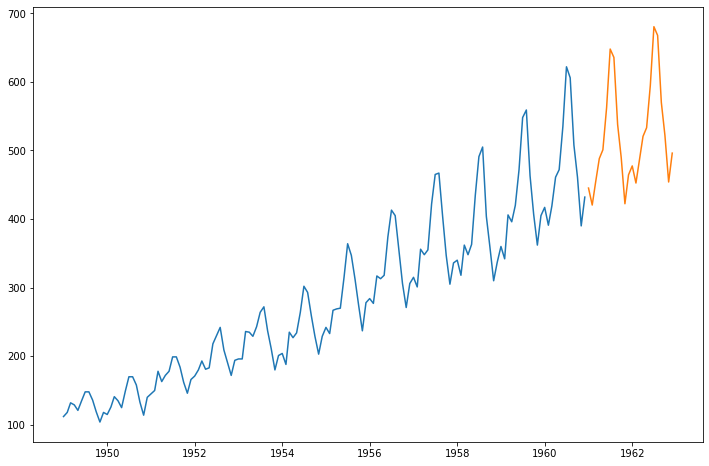

In [ ]:
forecast = sarima_model_fit.forecast(steps=forecast_length)

plt.figure(figsize=(12,8))
plt.plot(df.index, df['Passengers'])
plt.plot(forecast_rng, forecast)
plt.show()
